In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox

In [13]:
Data_train=pd.read_table(r'C:\Users\Xuebi\Desktop\machine_learning\Data_set\tianchi\zhengqi\zhengqi_train.txt')
Data_test=pd.read_table(r'C:\Users\Xuebi\Desktop\machine_learning\Data_set\tianchi\zhengqi\zhengqi_test.txt')
Data_test.rename(columns={'%V0':'V0'},inplace=True)

In [14]:
print('Train data')
print(Data_train.shape) #observe the size of data
print(Data_train.columns)#observe the features of data
print(Data_train.isnull().any()) #judge if there is any null value

print('Test data')
print(Data_test.shape) #observe the size of data
print(Data_test.columns)#observe the features of data
print(Data_test.isnull().any()) #judge if there is any null value

Data_train['train-test']='train'
Data_test['train-test']='test'
Data_total=pd.concat([Data_train,Data_test],axis=0,ignore_index=True)
Data_total.tail(20)

Train data
(2888, 39)
Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'target'],
      dtype='object')
V0        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
V29       False
V30       False
V31       False
V32       False
V33       False
V34       False
V35       False
V36       False
V37       False
target    False
dtype: bool
Test data
(1925, 38)
Inde

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,...,V36,V37,V4,V5,V6,V7,V8,V9,target,train-test
4793,0.961,1.069,-0.190,1.181,0.818,-0.312,-0.754,0.583,-0.969,2.023,...,-0.707,-0.067,0.735,2.155,-1.301,-1.326,0.321,-0.390,NaN,test
4794,1.123,1.300,0.063,1.012,0.639,-0.644,-0.648,0.605,-0.422,2.023,...,-0.182,0.380,1.011,2.063,-1.183,-1.266,0.844,-0.390,NaN,test
4795,1.250,1.376,0.072,1.626,0.642,-0.846,-0.583,0.886,-0.335,2.023,...,0.204,0.107,1.342,2.443,-1.131,-1.097,0.705,-0.390,NaN,test
4796,0.879,0.878,0.472,1.041,0.773,0.118,-0.536,1.026,-0.308,1.890,...,0.565,0.635,0.902,2.136,-1.121,-1.097,0.293,-0.390,NaN,test
4797,0.836,0.935,0.227,1.224,0.883,-0.741,-0.570,1.418,-0.262,1.758,...,0.015,-0.038,0.714,2.093,-1.003,-1.007,0.227,-0.390,NaN,test
4798,0.252,0.230,0.864,0.692,0.569,-0.543,-0.596,1.418,-0.169,1.492,...,0.819,1.398,0.680,1.744,-1.089,-0.990,-0.710,-0.390,NaN,test
4799,0.008,0.037,-0.168,0.816,0.413,0.278,-0.551,1.047,-0.722,1.492,...,-0.235,0.997,0.560,1.905,-1.233,-0.903,-0.824,-0.390,NaN,test
4800,0.057,0.220,-0.878,1.317,0.441,0.392,-0.503,0.703,-0.863,1.492,...,-0.955,0.164,0.368,2.255,-1.269,-0.929,-0.617,-0.390,NaN,test
4801,-0.367,-0.286,0.338,0.959,0.208,-1.056,-0.489,0.634,-0.790,1.492,...,-0.191,1.360,0.090,1.710,-1.293,-0.929,-1.211,-0.390,NaN,test
4802,-0.284,-0.099,-1.452,1.205,0.173,-0.110,-0.380,0.435,-1.084,1.492,...,-0.773,0.018,0.605,2.111,-1.372,-0.924,-0.506,-0.390,NaN,test


V0


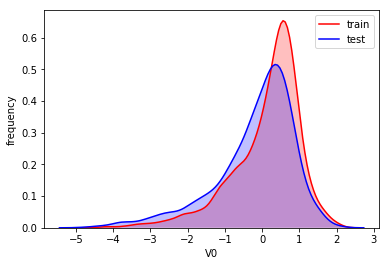

V1


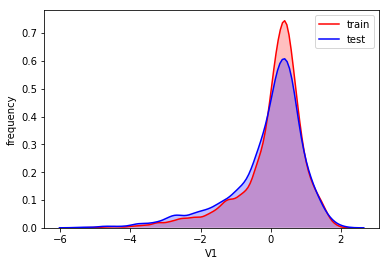

V10


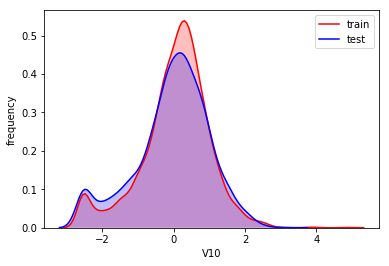

V11


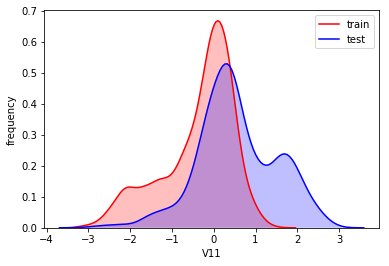

V12


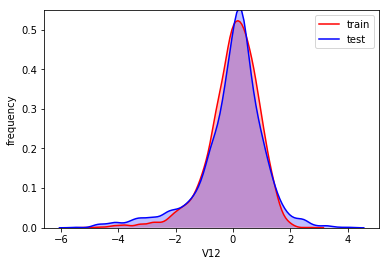

V13


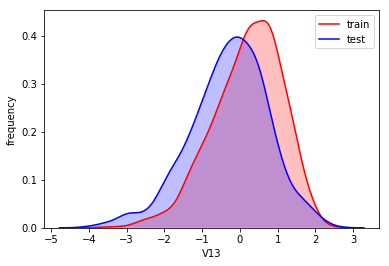

V14


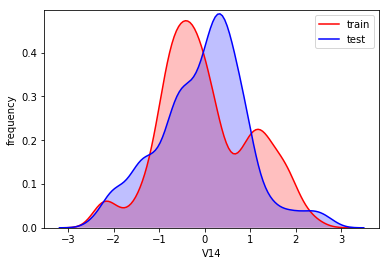

V15


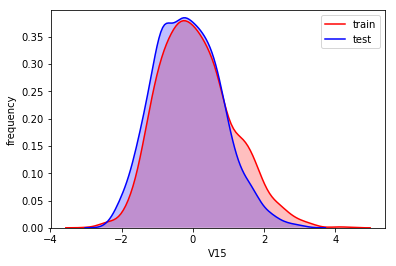

V16


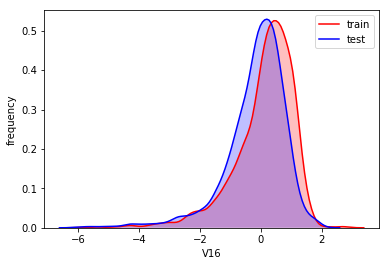

V17


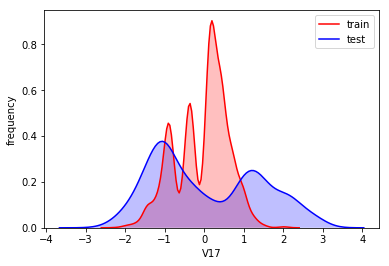

V18


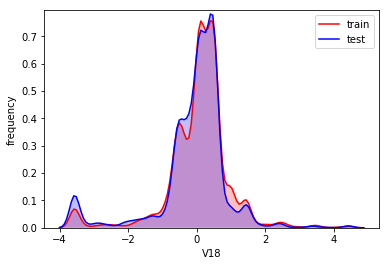

V19


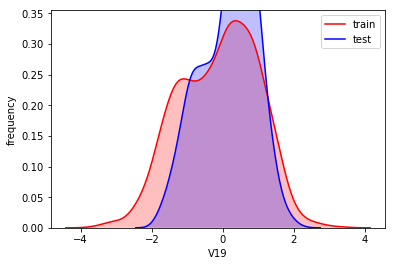

V2


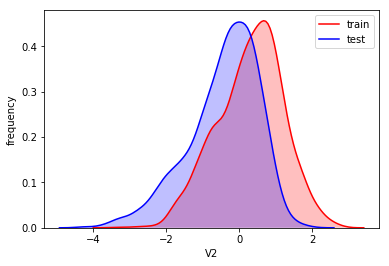

V20


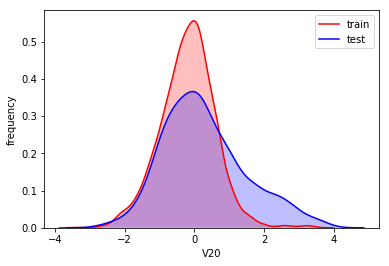

V21


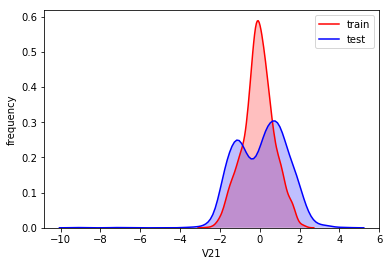

V22


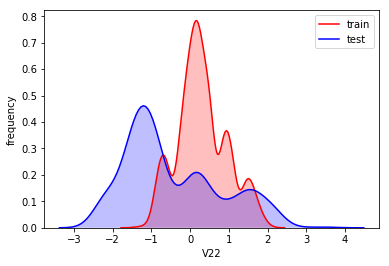

V23


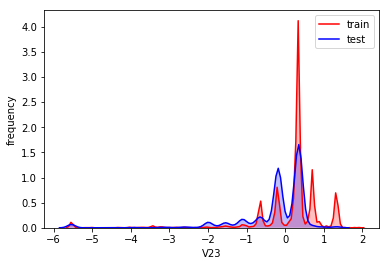

V24


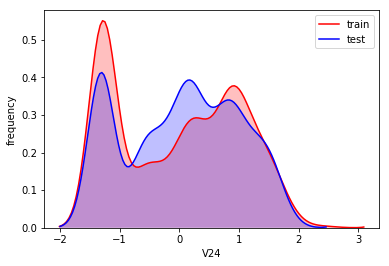

V25


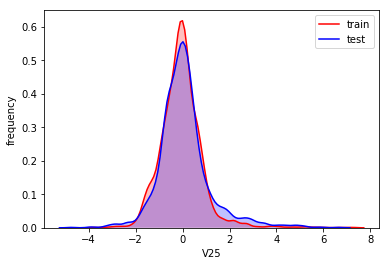

V26


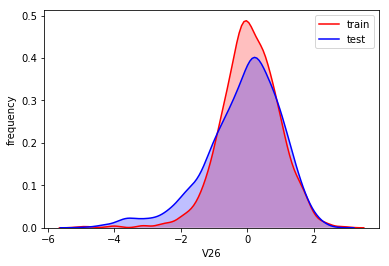

V27


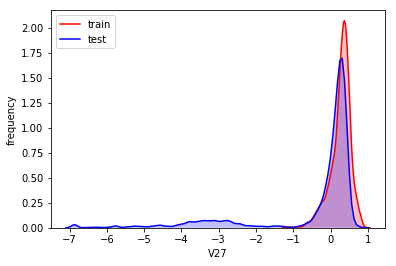

V28


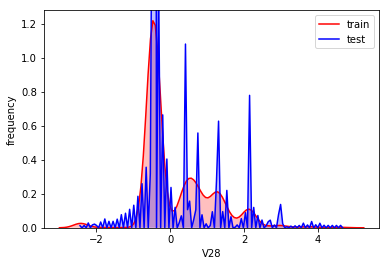

V29


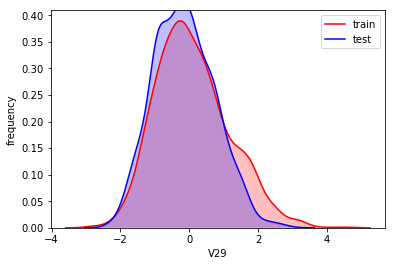

V3


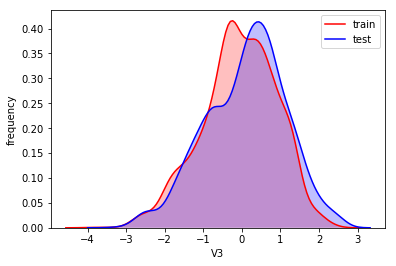

V30


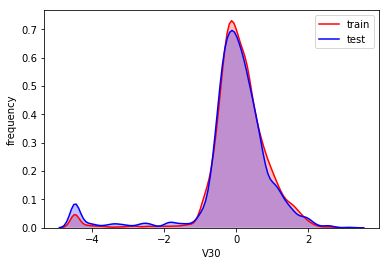

V31


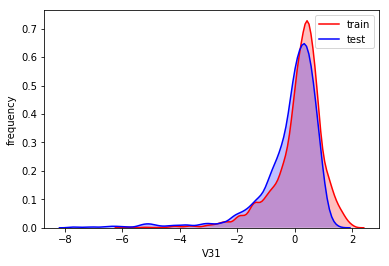

V32


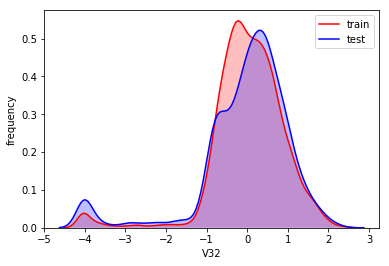

V33


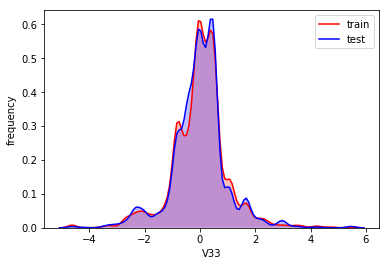

V34


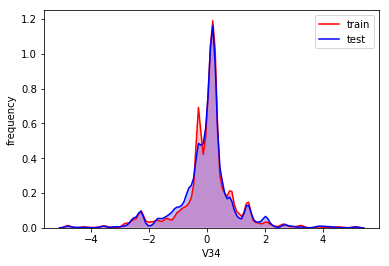

V35


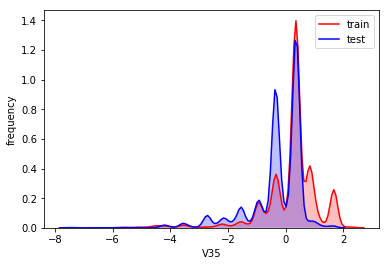

V36


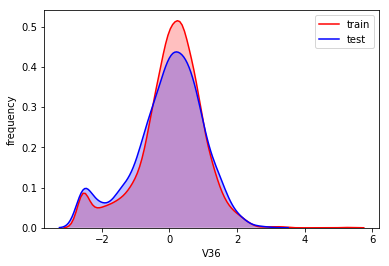

V37


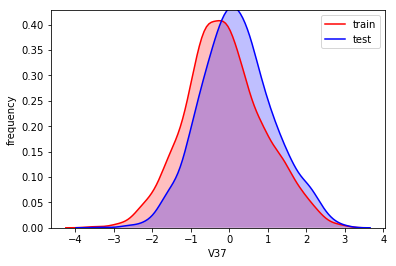

V4


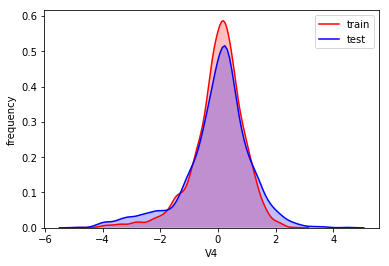

V5


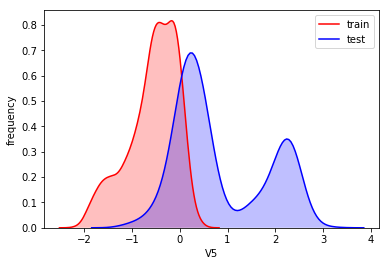

V6


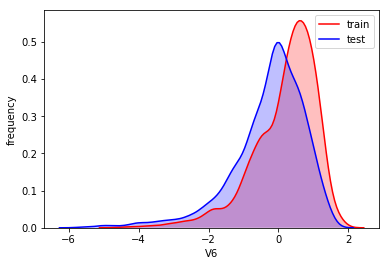

V7


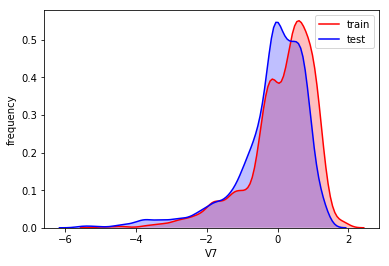

V8


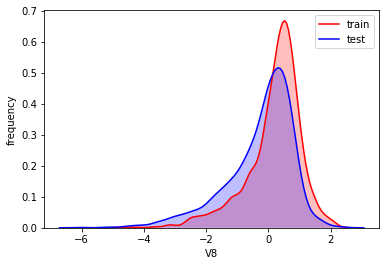

V9


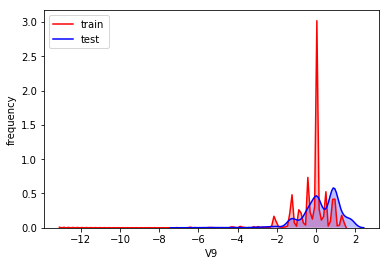

In [15]:
for columns in Data_total.columns[0:-2]:
    print(columns)
    g=sns.kdeplot(Data_total[columns][(Data_total['train-test']=='train')],shade=True,color='Red')
    g=sns.kdeplot(Data_total[columns][(Data_total['train-test']=='test')],shade=True,color='Blue',ax=g)
    g.set_xlabel(columns)
    g.set_ylabel('frequency')
    g.legend(['train','test'])
    plt.show()

In [16]:
for columns in Data_total.columns[0:-2]:
    g=sns.FacetGrid(Data_total,col='train-test')
    g=g.map(sns.distplot,columns)
    plt.show()

D:\Miniconda\Miniconda1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [17]:
Drop_columns=["V5","V9","V11","V17","V22","V28"]
Data_total.drop(Drop_columns,inplace=True,axis=1)
Data_total

,V0,V1,V10,V12,V13,V14,V15,V16,V18,V19,...,V34,V35,V36,V37,V4,V6,V7,V8,target,train-test
0,0.566,0.016,-0.940,-0.073,0.550,-0.484,0.000,-1.707,-0.573,-0.991,...,-4.789,-5.101,-2.608,-3.508,0.452,-1.812,-2.360,-0.436,0.175,train
1,0.968,0.437,0.188,-0.134,1.109,-0.488,0.000,-0.977,-0.571,-0.836,...,0.160,0.364,-0.335,-0.730,0.194,-1.566,-2.360,0.332,0.676,train
2,1.013,0.568,0.874,-0.072,0.767,-0.493,-0.212,-0.618,-0.564,-0.558,...,0.160,0.364,0.765,-0.589,0.112,-1.367,-2.360,0.396,0.633,train
3,0.733,0.368,0.011,-0.014,0.769,-0.371,-0.162,-0.429,-0.574,-0.564,...,-0.065,0.364,0.333,-0.112,0.599,-1.200,-2.086,0.403,0.206,train
4,0.684,0.638,-0.251,0.199,-0.349,-0.342,-0.138,-0.391,-0.572,-0.394,...,-0.215,0.364,-0.280,-0.028,0.337,-1.073,-2.086,0.314,0.384,train
5,0.445,0.627,-0.511,0.294,0.912,-0.345,0.111,-0.333,-0.573,-0.516,...,-0.290,0.364,-0.191,-0.883,0.458,-1.009,-1.896,0.481,0.060,train
6,0.889,0.416,-0.256,0.425,0.632,-0.300,0.111,-0.333,-0.586,-0.544,...,-0.290,0.364,-0.155,-1.318,0.224,-0.812,-1.823,0.729,0.415,train
7,0.984,0.529,-0.067,0.272,0.780,-0.387,0.244,0.065,-0.579,-0.465,...,-0.290,0.364,0.100,-0.899,0.258,-0.682,-1.721,0.753,0.609,train
8,0.948,0.850,0.205,0.387,-0.288,-0.264,0.293,0.166,-0.566,-0.173,...,-0.290,0.364,0.053,-0.553,0.591,-0.591,-1.524,0.763,0.981,train
9,1.157,1.055,0.145,0.688,-0.140,-0.289,0.317,0.195,-0.567,-0.557,...,-0.290,0.364,0.151,-1.157,1.483,-0.612,-1.524,0.968,0.818,train


In [18]:
Data1_train=Data_total[Data_total['train-test']=='train'].drop(['train-test'],axis=1)
fcols=2
frows=len(Data1_train.columns)
plt.figure(figsize=(5*fcols,4*frows))
i=0
for columns in Data1_train.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=columns,y='target',data=Data1_train,ax=ax,scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'})
    ax.set_xlabel(columns)
    ax.set_ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(Data1_train[columns] , fit=stats.norm)
    plt.xlabel(columns)

D:\Miniconda\Miniconda1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [19]:
threhold=0.1
corr_matrix=Data1_train.corr().abs()
columns_lowcor=corr_matrix.target[corr_matrix.target<threhold].index
columns_lowcor
Data_total.drop(columns_lowcor,axis=1,inplace=True)


columns_trans=list(Data_total.columns)
print(columns_trans)

['V0', 'V1', 'V10', 'V12', 'V13', 'V15', 'V16', 'V18', 'V19', 'V2', 'V20', 'V23', 'V24', 'V27', 'V29', 'V3', 'V30', 'V31', 'V35', 'V36', 'V37', 'V4', 'V6', 'V7', 'V8', 'target', 'train-test']


In [20]:
def Scale_minmax(col):
        return (col-col.min())/(col.max()-col.min())
columns_apply=[columns for columns in columns_trans if columns!='target']
columns_apply=[columns for columns in columns_apply if columns!='train-test']
print(columns_apply)
Data_total[columns_apply]=Data_total[columns_apply].apply(Scale_minmax,axis=0)

['V0', 'V1', 'V10', 'V12', 'V13', 'V15', 'V16', 'V18', 'V19', 'V2', 'V20', 'V23', 'V24', 'V27', 'V29', 'V3', 'V30', 'V31', 'V35', 'V36', 'V37', 'V4', 'V6', 'V7', 'V8']


In [21]:
fcol=3
frow=(len(columns_trans)-1)*2
i=0
plt.figure(figsize=(4*fcols,12*frows))
for columns in columns_apply:
    
    if columns!='target':
        dat = Data_total[[columns, 'target']].dropna()

        i+=1
        ax=plt.subplot(frow,fcol,i)
        sns.distplot(dat[columns],fit=stats.norm,ax=ax)
        ax.set_title(columns+' Original')
        ax.set_xlabel(columns)

        i+=1
        ax=plt.subplot(frow,fcol,i)
        _=stats.probplot(dat[columns], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[columns])))
        plt.xlabel('')
        plt.ylabel('')

        i+=1
        plt.subplot(frow,fcol,i)
        plt.plot(dat[columns], dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[columns], dat['target'])[0][1]))

        i+=1
        ax=plt.subplot(frow,fcol,i)
        boxcox_trans,_=stats.boxcox(dat[columns]+1)
        boxcox_trans = Scale_minmax(boxcox_trans)    
        sns.distplot(boxcox_trans,fit=stats.norm,ax=ax)
        ax.set_title(columns+' boxcox_transformed')
        ax.set_xlabel(columns)

        i+=1
        ax=plt.subplot(frow,fcol,i)
        _=stats.probplot(boxcox_trans, plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(boxcox_trans)))
        plt.xlabel('')
        plt.ylabel('')

        i+=1
        plt.subplot(frow,fcol,i)
        plt.plot(boxcox_trans,dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(boxcox_trans, dat['target'])[0][1]))

D:\Miniconda\Miniconda1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [22]:
Columns_coxtrans=Data_total.columns[0:-2]
print(Columns_coxtrans)
for columns in Columns_coxtrans:  
    Data_total[columns],_=stats.boxcox(Data_total[columns]+1)
    Data_total[columns]=Scale_minmax(Data_total[columns])
Data_total.head()
Data_total.describe()

Index(['V0', 'V1', 'V10', 'V12', 'V13', 'V15', 'V16', 'V18', 'V19', 'V2',
       'V20', 'V23', 'V24', 'V27', 'V29', 'V3', 'V30', 'V31', 'V35', 'V36',
       'V37', 'V4', 'V6', 'V7', 'V8'],
      dtype='object')


,V0,V1,V10,V12,V13,V15,V16,V18,V19,V2,...,V30,V31,V35,V36,V37,V4,V6,V7,V8,target
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,2888.000000
mean,0.419424,0.389889,0.241092,0.323282,0.479990,0.528658,0.335416,0.310597,0.413094,0.476083,...,0.326793,0.405785,0.427750,0.216648,0.572571,0.315248,0.467135,0.428167,0.398892,0.126353
std,0.167778,0.157171,0.108281,0.099635,0.161344,0.140938,0.121935,0.106805,0.138812,0.150090,...,0.112696,0.150973,0.143288,0.097257,0.147528,0.096309,0.180638,0.173001,0.147179,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.303978,0.297895,0.181074,0.266832,0.368431,0.427079,0.254781,0.260192,0.303565,0.372698,...,0.269468,0.316393,0.346351,0.161389,0.475759,0.263903,0.338290,0.318667,0.305057,-0.350250
50%,0.435521,0.401221,0.247291,0.324947,0.483041,0.528570,0.339776,0.310835,0.425529,0.480755,...,0.313778,0.414726,0.467466,0.219930,0.568745,0.317362,0.472277,0.431583,0.411630,0.313000
75%,0.531703,0.482376,0.305781,0.381187,0.592883,0.625505,0.417525,0.353967,0.513828,0.577807,...,0.377245,0.498561,0.467466,0.277023,0.669436,0.367602,0.598724,0.553587,0.491047,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [ ]:
for columns in Data_total.columns[0:-2]:
    g=sns.kdeplot(Data_total[columns][(Data_total['train-test']=='train')],shade=True,color='Red')
    g=sns.kdeplot(Data_total[columns][(Data_total['train-test']=='test')],shade=True,color='Blue',ax=g)
    g.set_xlabel(columns)
    g.set_ylabel('frequency')
    g.legend(['train','test'])
    plt.show()

In [ ]:
def get_traindata():
    df_train=Data_total[Data_total['train-test']=='train']
    df_train_X=df_train.drop(['target','train-test'],axis=1)
    df_train_y=df_train['target']
    X_train,X_test,y_train,y_test=train_test_split(df_train_X,df_train_y,test_size=0.3,random_state=100)
    return X_train,X_test,y_train,y_test

def get_testdata():
    df_test=Data_total[Data_total['train-test']=='test']
    df_test_X=df_test.drop(['target','train-test'],axis=1)
    return df_test_X

In [ ]:
from sklearn.metrics import make_scorer
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

In [ ]:
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    return outliers

In [ ]:
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import Ridge
X_train, X_valid,y_train,y_valid=get_traindata()
test=get_testdata()
outliers = find_outliers(Ridge(), X_train, y_train)
X_outliers=X_train.loc[outliers]
y_outliers=y_train.loc[outliers]
X_t=X_train.drop(outliers)
y_t=y_train.drop(outliers)

In [ ]:
def train_model(model, param_grid=[], X=[], y=[], 
                splits=5, repeats=5):
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring="neg_mean_squared_error",
                               verbose=1, return_train_score=True)

        # search the grid
        gsearch.fit(X,y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('mse=',mse(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [ ]:
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

splits=5
repeats=5

y_train_allmodel=pd.DataFrame([])

In [ ]:
model = 'Ridge'

alph_range = np.arange(0.25,6,0.25)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(Ridge(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

y_train_allmodel[model]=opt_models[model].predict(X_t)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
model = 'Lasso'
alph_range = np.arange(1e-3,5e-2,5e-4)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(Lasso(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

y_train_allmodel[model]=opt_models[model].predict(X_t)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
model ='ElasticNet'

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(ElasticNet(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=splits, repeats=1)

y_train_allmodel[model]=opt_models[model].predict(X_t)

cv_score.name = model
score_models = score_models.append(cv_score)
plt.show()

In [ ]:
model = 'GradientBoosting'


param_grid = {'n_estimators':[150,250,350],
              'max_depth':[3,4,5],
              'min_samples_split':[5,6,7]}

opt_models[model], cv_score, grid_results = train_model( GradientBoostingRegressor(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=splits, repeats=1)

y_train_allmodel[model]=opt_models[model].predict(X_t)

cv_score.name = model
score_models = score_models.append(cv_score)
plt.show()

In [ ]:
model = 'XGB'

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[3,4,5],'subsample': 0.8,
             }

opt_models[model], cv_score,grid_results = train_model(XGBRegressor(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=splits, repeats=1)

y_train_allmodel[model]=opt_models[model].predict(X_t)

cv_score.name = model
score_models = score_models.append(cv_score)

In [ ]:
model = 'RandomForest'

param_grid = {'n_estimators':[100,150,200],
              'max_features':[8,12,16,20,24],
              'min_samples_split':[2,4,6],'subsample': 0.8}

opt_models[model], cv_score, grid_results = train_model(RandomForestRegressor(), param_grid=param_grid, X=X_t,y=y_t,
                                              splits=5, repeats=1)

y_train_allmodel[model]=opt_models[model].predict(X_t)

cv_score.name = model
score_models = score_models.append(cv_score)

In [ ]:
y_train_allmodel

In [ ]:
def stack_result(Stack_data,y):
    model = 'Lasso'
    alph_range = np.arange(1e-3,5e-2,5e-4)
    param_grid = {'alpha': alph_range,'random_state':[2018,2019]}
     
    splits=5
    repeats=5
    
    Stack_model, cv_score, grid_results = train_model(Lasso(), param_grid=param_grid, X=Stack_data,y=y,
                                              splits=splits, repeats=1)
    return Stack_model
Stack_model=stack_result(y_train_allmodel,y_t)

In [ ]:
Result_validation = pd.DataFrame(columns=['mean','std'])
i=0
y_valid_pre_total=np.zeros((X_valid.shape[0],))
y_valid_allmodel=pd.DataFrame([])
for model in opt_models.keys():
    i=i+1
    y_valid_pre=opt_models[model].predict(X_valid)
    y_valid_pre_total+=y_valid_pre
    resid = y_valid - y_valid_pre
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid
    print('rmse=',rmse(y_valid, y_valid_pre))
    print("mse=",mean_squared_error(y_valid,y_valid_pre))
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,2,1)
    plt.plot(y_valid , y_valid_pre,'.')
    plt.xlabel('y_valid')
    plt.ylabel('y_valid_pre');
    plt.title(model+'corr = {:.3f}'.format(np.corrcoef(y_valid,y_valid_pre)[0][1]))
    
    ax_132=plt.subplot(1,2,2)
    plt.plot(y_valid,y_valid - y_valid_pre,'.')
    plt.xlabel('y_valid')
    plt.ylabel('y_valid - y_valid_pre');
    plt.title(model+'std resid = {:.3f}'.format(std_resid))
    
    model_result=pd.Series({'mean':mean_resid,'std':std_resid})
    model_result.name=model
    Result_validation.loc[model]=model_result
    
    y_valid_allmodel[model]=y_valid_pre

plt.show()


y_valid_allmodel['stack_lasso']=Stack_model.predict(y_valid_allmodel)
print('stack_lasso')
print('rmse=',rmse(y_valid_allmodel['stack_lasso'].values, y_valid))
print("mse=",mean_squared_error(y_valid_allmodel['stack_lasso'],y_valid))

y_valid_allmodel['stack_mean']=y_valid_pre_total/i 
print('stack_mean')
print('rmse=',rmse(y_valid_allmodel['stack_mean'].values, y_valid))
print("mse=",mean_squared_error(y_valid_allmodel['stack_mean'],y_valid))

In [ ]:
i=0
test=get_testdata()
y_test_total=np.zeros((test.shape[0],))
y_test_allmodel=pd.DataFrame([])
for model in opt_models.keys():
    i=i+1
    y_test=opt_models[model].predict(test)
    y_test_total+=y_test
    y_test_allmodel[model]=y_test
    
y_final_stack=Stack_model.predict(y_test_allmodel)
y_final_mean=y_test_total/i

In [ ]:
y_final['y_final_stack']=y_final_stack
y_final['y_final_mean']=y_final_mean
y_final

In [ ]:
#np.savetxt(r'C:\Users\Xuebi\Desktop\machine_learning\Data_set\tianchi\zhengqi\test_result4.txt', y_final['y_final_stack'])
